In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
train.shape

(27455, 785)

In [4]:
test.shape

(7172, 785)

In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

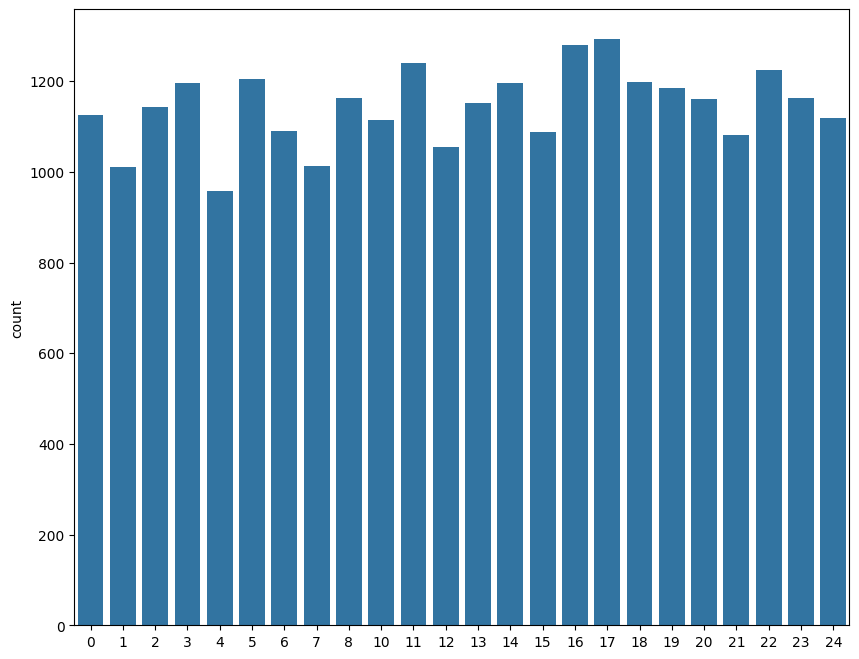

In [7]:
plt.figure(figsize = (10,8))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis = 1, inplace = True)

In [9]:
images = np.array([np.reshape(i, (28, 28)) for i in train.values])
images = np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


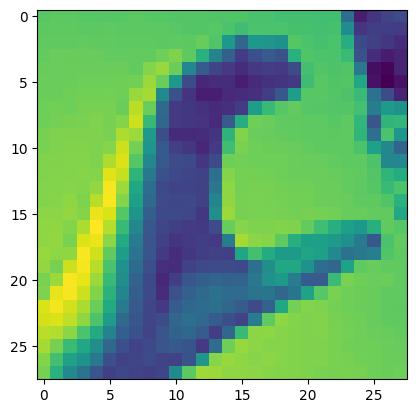

In [12]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
len(labels[0])

24

In [14]:
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [16]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 37)
batch_size = 128
num_classes = 24
epochs = 10

In [17]:
x_train = x_train/255
x_test = x_test/255

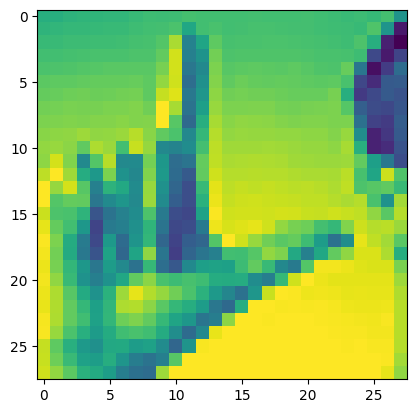

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [22]:
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [23]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [26]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 6s 36ms/step - loss: 2.6700 - accuracy: 0.1779 - val_loss: 1.8543 - val_accuracy: 0.4203
Epoch 2/10
151/151 [==============================] - 5s 34ms/step - loss: 1.4125 - accuracy: 0.5286 - val_loss: 0.9316 - val_accuracy: 0.7005
Epoch 3/10
151/151 [==============================] - 5s 34ms/step - loss: 0.8117 - accuracy: 0.7233 - val_loss: 0.5548 - val_accuracy: 0.8146
Epoch 4/10
151/151 [==============================] - 5s 34ms/step - loss: 0.5328 - accuracy: 0.8141 - val_loss: 0.3509 - val_accuracy: 0.8910
Epoch 5/10
151/151 [==============================] - 5s 34ms/step - loss: 0.3614 - accuracy: 0.8768 - val_loss: 0.2134 - val_accuracy: 0.9433
Epoch 6/10
151/151 [==============================] - 5s 34ms/step - loss: 0.2441 - accuracy: 0.9203 - val_loss: 0.1536 - val_accuracy: 0.9559
Epoch 7/10
151/151 [==============================] - 5s 34ms/step - loss: 0.1715 - accuracy: 0.9445 - val_loss: 0.0817 - val_accuracy: 0.9853

In [27]:
model.save("50epochs.h5")

C:\Users\safin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


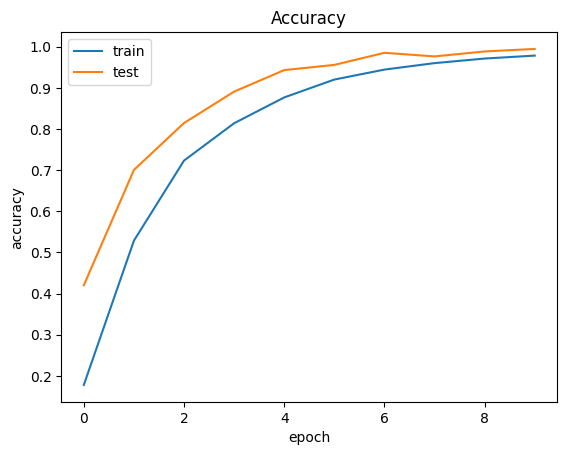

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'])
plt.show()

In [29]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = np.array([np.reshape(i, (28, 28)) for i in test.values])
test_images = np.array([i.flatten() for i in test_images])

test_label = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [30]:
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 4ms/step


In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_label, y_pred.round())
print(accuracy)


0.7771890686001115
